
1. **SARIMA and SARIMAX Analysis**:
   - Data visualization (plotting the time series).
   - Stationarity check and making the series stationary if needed.
   - ACF and PACF plots to determine AR and MA terms.
   - SARIMA model training and prediction.
   - SARIMAX model if exogenous variables are needed.
   


2. **Facebook Prophet**:
   - Preparing the data for Prophet (renaming columns).
   - Model fitting and forecasting.
   - Visualizing the predictions.
   


3. **Recurrent Neural Networks (RNNs)**:
   - Data preprocessing for RNNs.
   - Building and training the RNN model.
   - Predictions and evaluation.
   
Let's start with the first part: SARIMA and SARIMAX analysis.



# Time Series Analysis with SARIMA, SARIMAX, Facebook Prophet, and RNNs



In this notebook, we'll walk through different methods of time series analysis and forecasting using the provided dataset.

## Table of Contents:
1. [SARIMA and SARIMAX Analysis](#SARIMA-and-SARIMAX-Analysis)
2. [Facebook Prophet Analysis](#Facebook-Prophet-Analysis)
3. [Recurrent Neural Networks (RNNs)](#Recurrent-Neural-Networks)

---



### SARIMA and SARIMAX Analysis



#### Visualizing the Data

First, let's visualize the time series data to understand its patterns and trends.


In [82]:
from capstone_functions import *
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('seaborn')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



C:\Users\Samsickle\AppData\Local\Temp\ipykernel_7012\1803805516.py:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [83]:

# Load the dataset
master_df = pd.read_parquet("../Data/master_df.parquet")

# Set the random.seed(42)
np.random.seed(42)

# sns.set_style('538')
master_df.info()
master_df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1131 entries, 2020-02-15 to 2023-03-21
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   new_confirmed                         1131 non-null   int32  
 1   new_fatal                             1131 non-null   int32  
 2   confirmed                             1131 non-null   int32  
 3   fatal                                 1131 non-null   int32  
 4   infected                              1131 non-null   int32  
 5   new_recovered                         1131 non-null   int32  
 6   recovered                             1131 non-null   int32  
 7   total_removed                         1131 non-null   int32  
 8   new_hospitalized_patients             944 non-null    float32
 9   current_hospitalized_patients         1131 non-null   float32
 10  current_intensive_care_patients       1131 non-null   float32
 11 

new_confirmed  new_fatal  confirmed  fatal  infected  \
date                                                               
2020-02-15              0          0         15      0        15   
2020-02-16              0          0         15      0        15   
2020-02-17             10          0         25      0        25   
2020-02-18              0          0         25      0        25   
2020-02-19              0          0         25      0        25   

            new_recovered  recovered  total_removed  \
date                                                  
2020-02-15              0          0              0   
2020-02-16              0          0              0   
2020-02-17              0          0              0   
2020-02-18              0          0              0   
2020-02-19              0          0              0   

            new_hospitalized_patients  current_hospitalized_patients  \
date                                                                   
2020-02-15                        0.0                            0.0   
2020-02-16                        0.0                            0.0   
2020-02-17                        0.0                            0.0   
2020-02-18                        0.0                            0.0   
2020-02-19                        0.0                            0.0   

            current_intensive_care_patients  average_temperature_celsius  \
date                                                                       
2020-02-15                              0.0                     0.956790   
2020-02-16                              0.0                     3.919753   
2020-02-17                              0.0                     6.197531   
2020-02-18                              0.0                     0.592593   
2020-02-19                              0.0                    -2.753086   

            cancel_events  cumulative_hospitalized_patients  \
date                                                          
2020-02-15            0.0                               0.0   
2020-02-16            0.0                               0.0   
2020-02-17            0.0                               0.0   
2020-02-18            0.0                               0.0   
2020-02-19            0.0                               0.0   

            derived_reproduction_rate  dew_point  excess_mortality  \
date                                                                 
2020-02-15                  35.466824  -6.882716         -2.363827   
2020-02-16                  34.655106  -5.919753         -2.360000   
2020-02-17                  33.889042  -0.481481         -2.294236   
2020-02-18                  33.163906  -5.759259         -2.166535   
2020-02-19                  32.475555  -7.364198         -1.976897   

            excess_mortality_cumulative  excess_mortality_cumulative_absolute  \
date                                                                            
2020-02-15                    -3.049970                         -12854.276367   
2020-02-16                    -3.030000                         -13024.399414   
2020-02-17                    -3.005807                         -13172.550781   
2020-02-18                    -2.977392                         -13298.730469   
2020-02-19                    -2.944754                         -13402.938477   

            facial_coverings  gatherings_restrictions  information_campaigns  \
date                                                                           
2020-02-15               0.0                      0.0                    0.0   
2020-02-16               0.0                      0.0                    0.0   
2020-02-17               0.0                      0.0                    0.0   
2020-02-18               0.0                      0.0                    0.0   
2020-02-19               0.0                      0.0                    0.0   

            internal_movement_restrictions  \
dat

In [84]:
cutoff=60

cutoff_date = master_df.index.max() - pd.Timedelta(days=cutoff)

train_df = master_df[master_df.index < cutoff_date].copy()
test_df = master_df[master_df.index >= cutoff_date].copy()


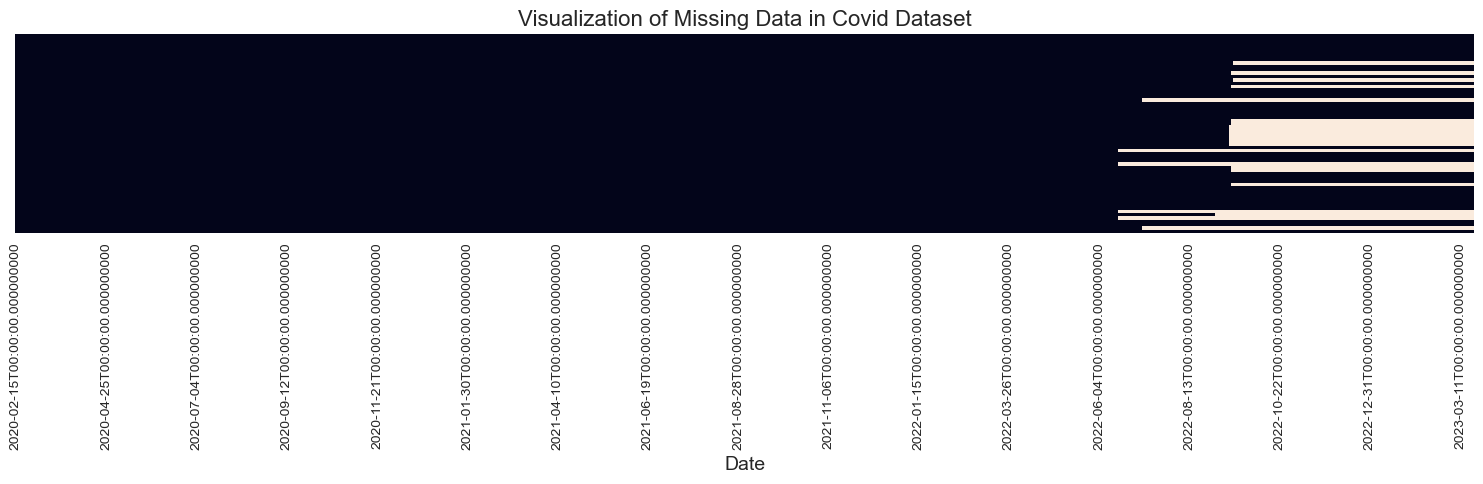

In [85]:
# master_df.index = pd.to_datetime(master_df.index).date
# import matplotlib.dates as mdates

# Your existing code
plt.figure(figsize=(15,5))
sns.heatmap(master_df.isna().T, yticklabels=[], cbar=False)

# Setting x-axis to show every 3 months and starting from 2020-02-15
ax = plt.gca()
xticks = ax.get_xticks()
ax.set_xticks(xticks[::5])

plt.title("Visualization of Missing Data in Covid Dataset", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.tight_layout()
plt.show()

In [86]:
# Creating subplots vertically aligned
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=("Daily Confirmed Cases", "Currently Infected", "Total Confirmed"))

# Adding traces for the train dataset
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['new_confirmed'], name='New Confirmed (Train)', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['infected'], name='Currently Infected (Train)', line=dict(color='blue')), row=2, col=1)
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['confirmed'], name='Total Confirmed (Train)', line=dict(color='blue')), row=3, col=1)

# Adding traces for the test dataset
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['new_confirmed'], name='New Confirmed (Test)', line=dict(color='red')), row=1, col=1)
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['infected'], name='Currently Infected (Test)', line=dict(color='red')), row=2, col=1)
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['confirmed'], name='Total Confirmed (Test)', line=dict(color='red')), row=3, col=1)

# Update the layout
fig.update_layout(height=800, 
                width=1000, 
                title='Daily Confirmed Cases, Currently Infected, and Total Confirmed',
                xaxis_rangeslider_visible=False)
fig.update_xaxes(title_text='Date', row=3, col=1)
fig.update_yaxes(title_text='New Confirmed Cases', row=1, col=1)
fig.update_yaxes(title_text='Currently Infected', row=2, col=1)
fig.update_yaxes(title_text='Total Confirmed', row=3, col=1)



### Checking Stationarity
Before applying ARIMA or its variants, it's essential to ensure our time series is stationary.


In [87]:
def check_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    return dfoutput


In [88]:

test_stationarity(master_df['confirmed'])



Results of Dickey-Fuller Test:


Test Statistic                   -0.159874
p-value                           0.943139
#Lags Used                       22.000000
Number of Observations Used    1108.000000
Critical Value (1%)              -3.436266
Critical Value (5%)              -2.864152
Critical Value (10%)             -2.568161
dtype: float64


If the `p-value` is less than 0.05, the series is stationary. Otherwise, you might need to take differences or transformations to make it stationary.


In [89]:
# List to collect the 'Test Statistic' values for each differencing level
test_statistics = []

# Iterate over possible differencing levels from 1 to 19
for i in range(1, 20):
    # Difference the 'confirmed' series by the current level and drop NA values
    differenced_series = master_df['confirmed'].diff(i).dropna()
    
    # Get the test statistic from the stationarity check and append to the list
    test_stat = check_stationarity(differenced_series).loc['Test Statistic']
    test_statistics.append(test_stat)

# Display the collected test statistics for each differencing level
for i, test_stat in enumerate(test_statistics, 1):
    print(f"Differencing Level {i}: Test Statistic = {test_stat:.2f}")

Differencing Level 1: Test Statistic = -4.78
Differencing Level 2: Test Statistic = -4.42
Differencing Level 3: Test Statistic = -4.37
Differencing Level 4: Test Statistic = -3.59
Differencing Level 5: Test Statistic = -3.84
Differencing Level 6: Test Statistic = -3.52
Differencing Level 7: Test Statistic = -3.46
Differencing Level 8: Test Statistic = -3.11
Differencing Level 9: Test Statistic = -2.92
Differencing Level 10: Test Statistic = -3.15
Differencing Level 11: Test Statistic = -2.95
Differencing Level 12: Test Statistic = -3.32
Differencing Level 13: Test Statistic = -3.93
Differencing Level 14: Test Statistic = -4.10
Differencing Level 15: Test Statistic = -4.43
Differencing Level 16: Test Statistic = -3.49
Differencing Level 17: Test Statistic = -3.55
Differencing Level 18: Test Statistic = -3.58
Differencing Level 19: Test Statistic = -3.64


In [90]:
test_stationarity(master_df['new_confirmed'])


Results of Dickey-Fuller Test:


Test Statistic                   -4.783973
p-value                           0.000058
#Lags Used                       21.000000
Number of Observations Used    1109.000000
Critical Value (1%)              -3.436260
Critical Value (5%)              -2.864150
Critical Value (10%)             -2.568159
dtype: float64

### Seasonality

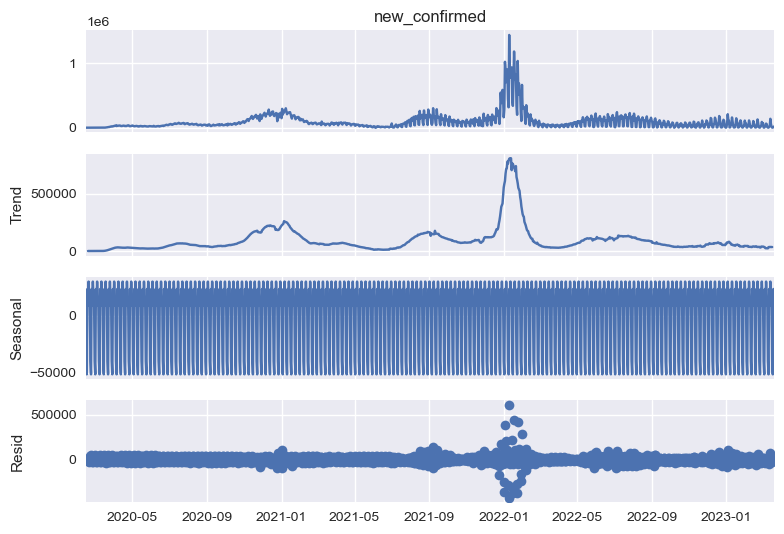

In [91]:
# Performing seasonal decomposition on 'new_confirmed' column
tsa.seasonal_decompose(master_df['new_confirmed'], model='additive', period=7).plot();


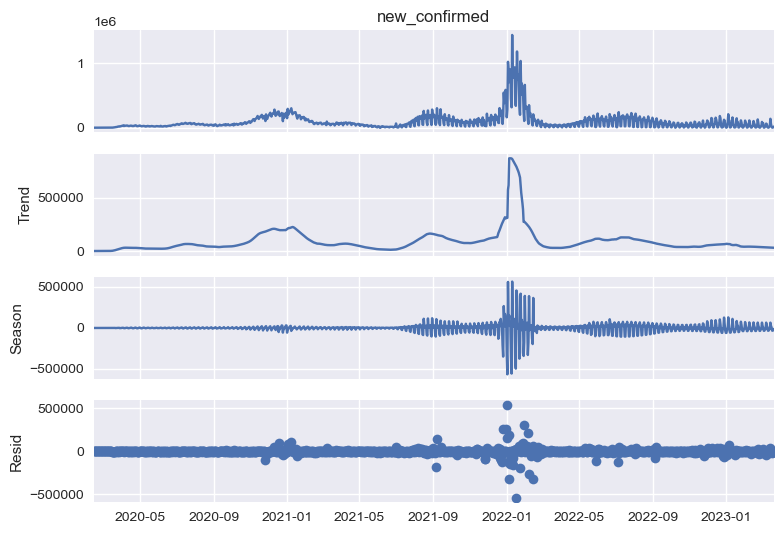

In [92]:

from statsmodels.tsa.seasonal import STL
stl = STL(master_df['new_confirmed'], seasonal=7, period=7, robust=True, seasonal_deg=0)
result = stl.fit()

master_df['trend'] = result.trend
master_df['seasonal'] = result.seasonal
master_df['resid'] = result.resid

result.plot();

This is a little difficult for me to understand, except to say that there really doesn't appear to be much of a seasonal component.

In [93]:
X, y = create_features(master_df, label='new_confirmed')
features_and_target = pd.concat([X, y], axis=1)

features_and_target.head()

hour  dayofweek  quarter  month  year  dayofyear  dayofmonth  \
date                                                                       
2020-02-15     0          5        1      2  2020         46          15   
2020-02-16     0          6        1      2  2020         47          16   
2020-02-17     0          0        1      2  2020         48          17   
2020-02-18     0          1        1      2  2020         49          18   
2020-02-19     0          2        1      2  2020         50          19   

            weekofyear    weekday  season  new_confirmed  
date                                                      
2020-02-15           7   Saturday  Winter              0  
2020-02-16           7     Sunday  Winter              0  
2020-02-17           8     Monday  Winter             10  
2020-02-18           8    Tuesday  Winter              0  
2020-02-19           8  Wednesday  Winter              0

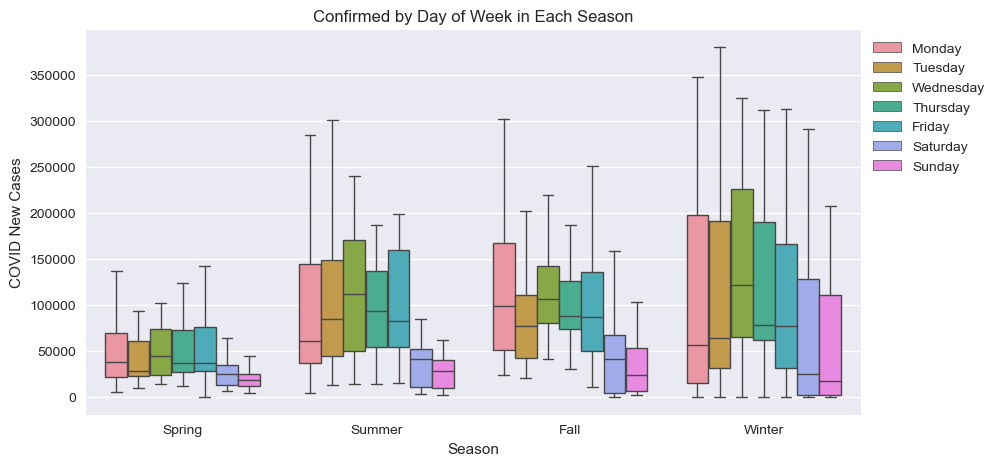

In [94]:


fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='season',
            y='new_confirmed',
            hue='weekday',
            ax=ax,
            linewidth=1,
            showfliers=False)
ax.set_title('Confirmed by Day of Week in Each Season')
ax.set_xlabel('Season')
ax.set_ylabel('COVID New Cases')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

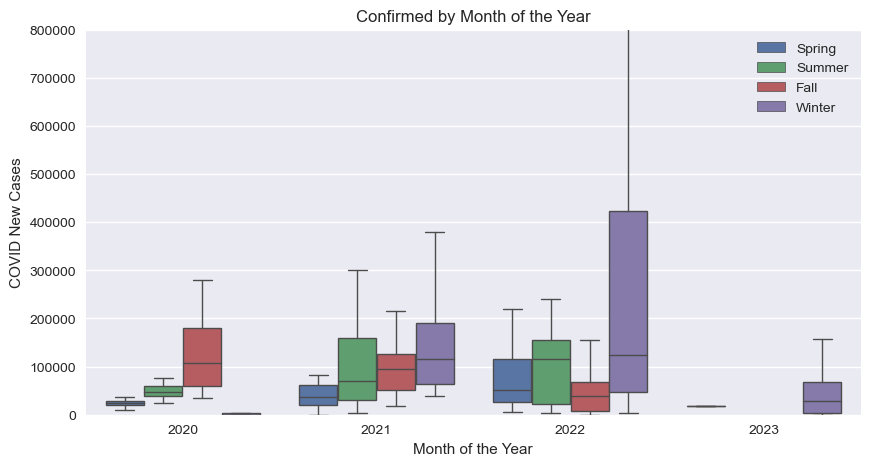

In [95]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='year',
            y='new_confirmed',
            hue='season',
            ax=ax,
            linewidth=1,
            showfliers=False)
ax.set_title('Confirmed by Month of the Year')
ax.set_xlabel('Month of the Year')
ax.set_ylabel('COVID New Cases')
ax.set_ylim(0, 800000)
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


### ACF and PACF plots
To determine the order of the AR and MA terms, we can plot the autocorrelation and partial autocorrelation charts.


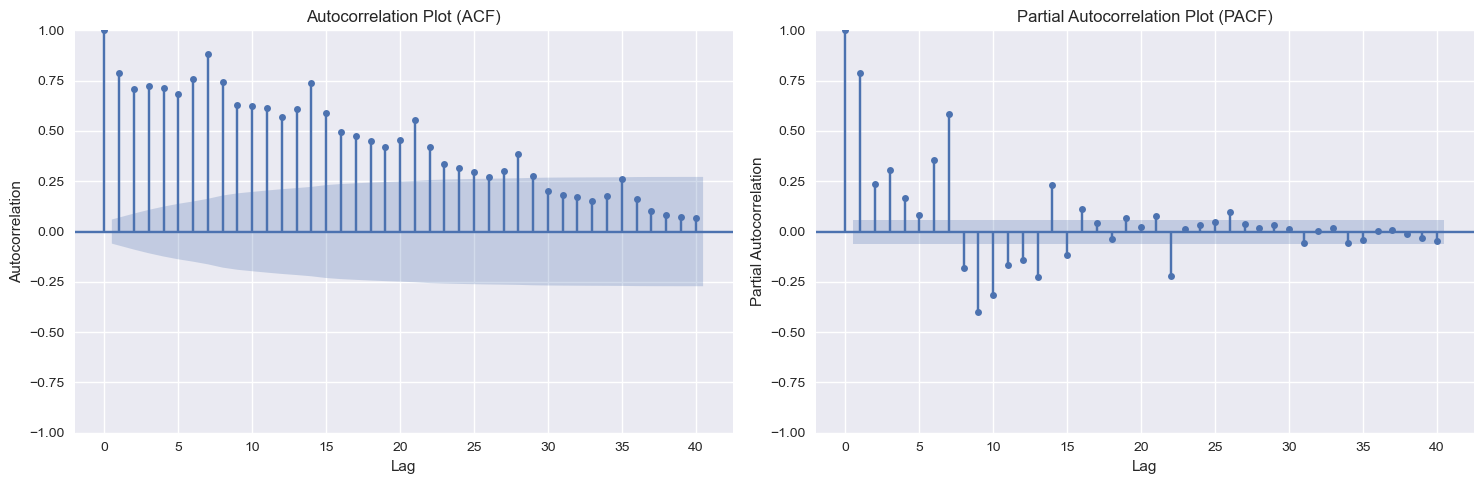

In [96]:
# Adjust the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot ACF
plot_acf(train_df['new_confirmed'].dropna(), lags=40, ax=ax[0], title="Autocorrelation Plot (ACF)")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Autocorrelation")
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot PACF
plot_pacf(train_df['new_confirmed'].dropna(), lags=40, ax=ax[1], title="Partial Autocorrelation Plot (PACF)")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Partial Autocorrelation")
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()


From the PACF it looks like our auto regressive model would only benefit by a maximum of 15-16 days. We will use this as our base p value.  
From our ACF graph it looks like our moving average model would only benefit by a maximum of 25-28 days. We will use this as our base q value.  

### Time Series Cross-Validation Setup

In [114]:
def plot_cross_val(df: pd.DataFrame,
                    title_text: str,
                    fold_size: int,
                    rolling: bool=True,
                    window_size: int=150,
                    initial_size: int=200) -> pd.DataFrame:
    """
    Visualize the train and test splits of cross-validation using Plotly.
    
    This function generates a visual representation of how data is split into 
    training and testing sets across multiple iterations of a cross-validation 
    process. It's particularly useful for understanding the behavior of different 
    cross-validation strategies, such as KFold or TimeSeriesSplit.
    
    Parameters:
    - n_splits (int): Number of splits for cross-validation.
    - splitter_func (callable): Cross-validation splitting strategy (e.g., KFold, TimeSeriesSplit).
    - df (pd.DataFrame): Dataframe whose index is to be used for splitting.
    - title_text (str): Title of the plot.
    
    Returns:
    - plot_df (pd.DataFrame): DataFrame with indices used for each split and their corresponding labels.
    """
    
    split = 1
    plot_data = []

    if rolling:
    # Iterate through train and test splits provided by the splitter function
    
        rolling_cv = RollingForecastCV(
            h=fold_size,            # Forecast horizon (28 step ahead)
            step=fold_size,         # Step size for rolling window (28 step at a time)
            initial=initial_size)   # Skip the first 20 observations for warm-up
        for train_index, valid_index in rolling_cv.split(df):
            plot_data.append([train_index, 'Train', f'{split}'])
            plot_data.append([valid_index, 'Test', f'{split}'])
            split += 1
    else:
        window_cv = pm.model_selection.SlidingWindowForecastCV(
            window_size=window_size,         # Window size (150 observations)
            h=fold_size,             # Forecast horizon (28 step ahead)
            step=fold_size)          # Step size for rolling window (28 step at a time)
        # Iterate through train and test splits provided by the splitter function
        
        for train_index, valid_index in window_cv.split(df):
            plot_data.append([train_index, 'Train', f'{split}'])
            plot_data.append([valid_index, 'Test', f'{split}'])
            split += 1
    
    # Create a DataFrame to hold the indices for plotting
    plot_df = pd.DataFrame(plot_data, columns=['Index', 'Dataset', 'Split']).explode('Index')
    plot_df['Split'] = plot_df['Split'].astype(int)
    plot_df = plot_df.sort_values('Split')

    # Initialize a Plotly figure
    fig = go.Figure()

    # Add traces for each train and test split
    for _, group in plot_df.groupby('Split'):
        fig.add_trace(go.Scatter(x=group['Index'].loc[group['Dataset'] == 'Train'],
                                y=group['Split'].loc[group['Dataset'] == 'Train'],
                                name='Train',
                                line=dict(color="blue", width=10)
                                ))
        fig.add_trace(go.Scatter(x=group['Index'].loc[group['Dataset'] == 'Test'],
                                y=group['Split'].loc[group['Dataset'] == 'Test'],
                                name='Test',
                                line=dict(color="goldenrod", width=10)
                                ))

    # Configure plot layout
    fig.update_layout(template="simple_white", 
                    font=dict(size=20),
                    title_text=title_text, 
                    title_x=0.5, width=850,
                    height=450, 
                    xaxis_title='Index', 
                    yaxis_title='Split')

    # Update legend to avoid duplicate entries
    legend_names = set()
    fig.for_each_trace(
        lambda trace:
        trace.update(showlegend=False)
        if (trace.name in legend_names) else legend_names.add(trace.name))
    fig.show()
    


# Import packages


In [125]:
previous = train_df['new_confirmed']
actual = test_df['new_confirmed']

number_of_folds = 30
fold_size = int(((len(train_df)-200)/number_of_folds)-round(30/number_of_folds))
print("Fold Size =", fold_size)


rolling_cv = RollingForecastCV(
    h=fold_size,  # Forecast horizon (28 step ahead)
    step=fold_size,  # Step size for rolling window (28 step at a time)
    initial=200)  # Skip the first 20 observations for warm-up


# Plot the time series cross validation splits
plot_cross_val(train_df,
            'Time Series Rolling Forecast Cross-Validation',
            fold_size,
            rolling=True)

window_cv = pm.model_selection.SlidingWindowForecastCV(
    window_size=150, # Window size (150 observations)
    h=fold_size,  # Forecast horizon (28 step ahead)
    step=fold_size)  # Step size for rolling window (28 step at a time)

# Plot the time series cross validation splits
plot_cross_val(train_df,
            'Time Series Sliding Window Cross-Validation',
            fold_size,
            rolling=False)

Fold Size = 28


# ARIMA

In [ ]:
from matplotlib.ticker import FuncFormatter, PercentFormatter

# Format right y-axis with comma notation
def comma_format(x, _):
    return f'{x:,.0f}'

def mape(actual, pred):
    return 100 * np.mean(np.abs(actual - pred) / (np.abs(actual)))

def smape(actual, pred):
    return 100 * np.mean(np.abs(actual - pred) / (np.abs(actual) + np.abs(pred)))

def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred)**2))


In [122]:
# Define the pipeline
estimators = [
    # ("boxcox", BoxCoxEndogTransformer()),
    ("model", pm.ARIMA(order= [10, 1, 9], 
                    freq='D',
                    suppress_warnings=True))
                    ]

pipeline = Pipeline(estimators)

# Assume y is your time series data
y = train_df['confirmed']

In [117]:
def train_model(y, pipeline, cv):
    """
    Train a model on the given data and generate predictions.
    
    Parameters:
    - y: DataFrame containing the training data.
    - pipeline: Preprocessing pipeline for the data.
    - cv: Cross-validator for time series data.
    
    Returns:
    - model_preds: Series of model predictions.
    - model_scores: DataFrame containing the scores for various metrics.
    """
    model_preds = pd.Series(name='predicted')
    model_mape_score = pd.Series(name='mape')
    model_smape_score = pd.Series(name='smape')
    model_rmse_score = pd.Series(name='rmse')
    model_mae_score = pd.Series(name='mae')
    
    def mape(actual, pred):
        return 100 * np.mean(np.abs(actual - pred) / (np.abs(actual)))

    def smape(actual, pred):
        return 100 * np.mean(np.abs(actual - pred) / (np.abs(actual) + np.abs(pred)))

    def rmse(actual, pred):
        return np.sqrt(np.mean((actual - pred)**2))

    for train_idx, test_idx in cv.split(y):
        train_set = y.iloc[train_idx]
        test_set = y.iloc[test_idx]
        assert not train_set.isna().any(), "train_set contains NaN values"
        assert not test_set.isna().any(), "test_set contains NaN values"

        model = pipeline.fit(train_set)
        prediction = model.predict(len(test_set))

        model_preds = pd.concat([model_preds, prediction])

        first_date = test_set.index[0]
        model_smape_score[first_date] = smape(test_set, prediction)
        model_rmse_score[first_date] = rmse(test_set, prediction)
        model_mae_score[first_date] = mean_absolute_error(test_set, prediction)
        model_mape_score[first_date] = mape(test_set, prediction)
    
    model_scores = pd.DataFrame(
        index=['smape', 'mape', 'rmse', 'mae'], 
        data=[model_smape_score, model_mape_score, model_rmse_score, model_mae_score]
    ).T
    
    return model_preds, model_scores



In [118]:

def generate_daily_metrics(model_preds, actual):
    """
    Generate various metrics and performance data from the predictions.
    
    Parameters:
    - plot_df: DataFrame containing the model predictions and actual data.
    - actual: Actual values to compare against the predictions.
    
    Returns:
    - plot_df: DataFrame updated with the new metrics.
    """
    
    plot_df = pd.DataFrame({'predicted': model_preds, 'confirmed': actual})
    plot_df['daily_predicted'] = plot_df['predicted'].diff()
    plot_df['daily_confirmed'] = plot_df['confirmed'].diff()
    plot_df['rmse'] = np.sqrt((plot_df['confirmed'] - plot_df['predicted'])**2)
    plot_df['mae'] = np.abs(plot_df['confirmed'] - plot_df['predicted'])
    plot_df['mape'] = 100 * np.abs(plot_df['confirmed'] - plot_df['predicted']) / np.abs(actual)
    plot_df['smape'] =  100 * np.abs(plot_df['confirmed'] - plot_df['predicted']) / (np.abs(actual) + np.abs(plot_df['predicted']))
    
    return plot_df



In [119]:
predictions, scores = train_model(y, pipeline, rolling_cv)


KeyboardInterrupt: 

In [ ]:

daily_df = generate_daily_metrics(predictions, train_df['confirmed'])

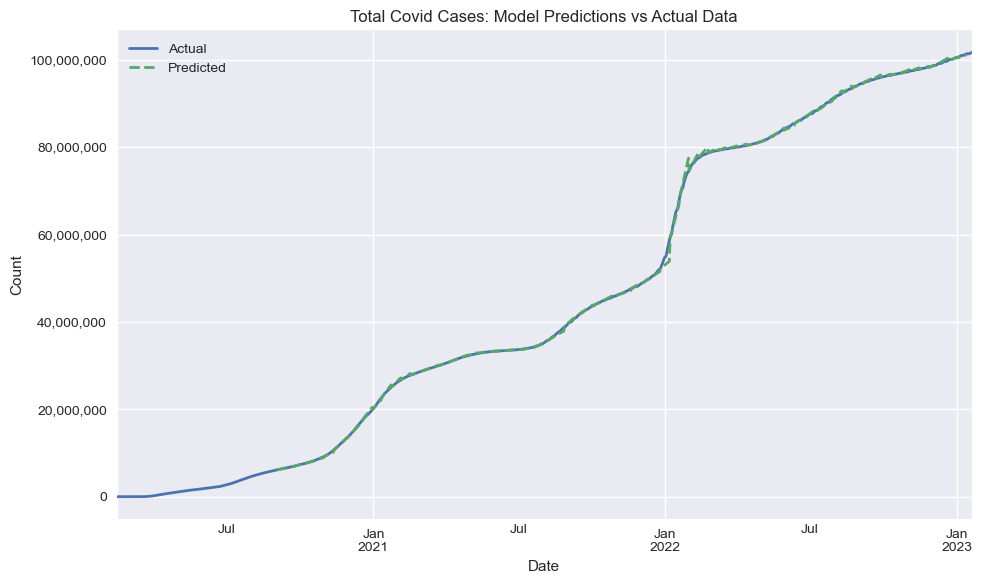

In [ ]:

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
daily_df['confirmed'].plot(ax=ax, label='Actual', linewidth=2)
daily_df['predicted'].plot(ax=ax, label='Predicted', linestyle='--', linewidth=2)

# Format the y-axis with comma notation
ax.yaxis.set_major_formatter(FuncFormatter(comma_format))

# Set title, labels and legend
ax.set_title('Total Covid Cases: Model Predictions vs Actual Data')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


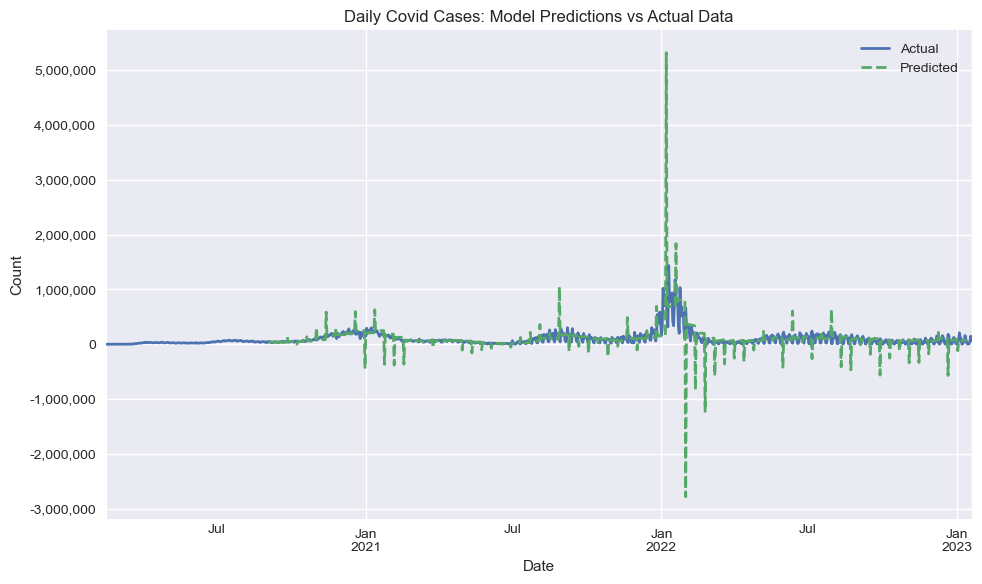

In [ ]:

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
daily_df['daily_confirmed'].plot(ax=ax, label='Actual', linewidth=2)
daily_df['daily_predicted'].plot(ax=ax, label='Predicted', linestyle='--', linewidth=2)

# Format the y-axis with comma notation
ax.yaxis.set_major_formatter(FuncFormatter(comma_format))

# Set title, labels and legend
ax.set_title('Daily Covid Cases: Model Predictions vs Actual Data')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
daily_df

predicted  confirmed  daily_predicted  daily_confirmed  rmse  mae  \
2020-02-15        NaN         15              NaN              NaN   NaN  NaN   
2020-02-16        NaN         15              NaN              0.0   NaN  NaN   
2020-02-17        NaN         25              NaN             10.0   NaN  NaN   
2020-02-18        NaN         25              NaN              0.0   NaN  NaN   
2020-02-19        NaN         25              NaN              0.0   NaN  NaN   
...               ...        ...              ...              ...   ...  ...   
2023-01-15        NaN  101361142              NaN           3735.0   NaN  NaN   
2023-01-16        NaN  101369550              NaN           8408.0   NaN  NaN   
2023-01-17        NaN  101428192              NaN          58642.0   NaN  NaN   
2023-01-18        NaN  101573353              NaN         145161.0   NaN  NaN   
2023-01-19        NaN  101641282              NaN          67929.0   NaN  NaN   

            mape  smape  
2020-02-15   NaN    NaN  
2020-02-16   NaN    NaN  
2020-02-17   NaN    NaN  
2020-02-18   NaN    NaN  
2020-02-19   NaN    NaN  
...          ...    ...  
2023-01-15   NaN    NaN  
2023-01-16   NaN    NaN  
2023-01-17   NaN    NaN  
2023-01-18   NaN    NaN  
2023-01-19   NaN    NaN  

[1070 rows x 8 columns]

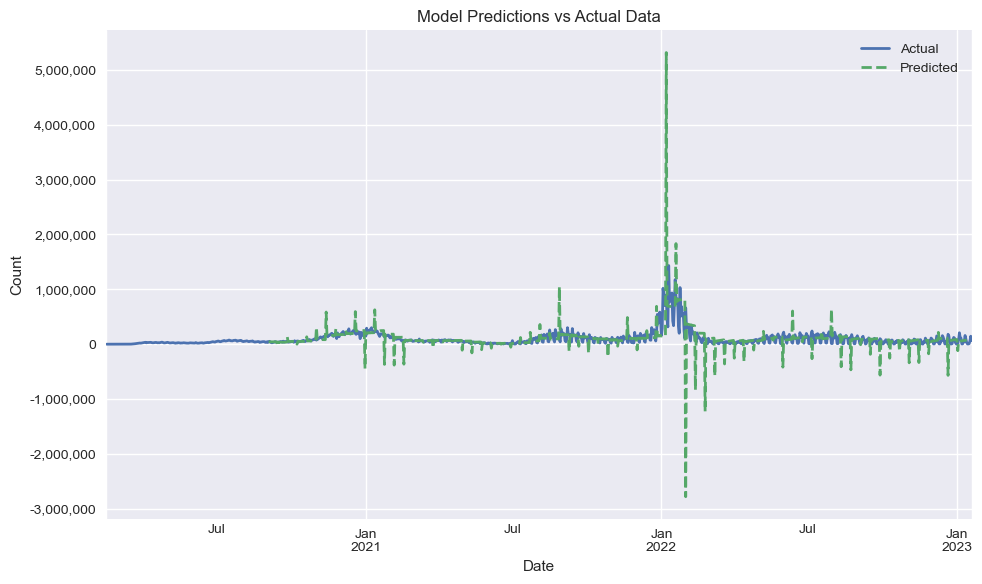

In [ ]:

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
daily_df['daily_confirmed'].plot(ax=ax, label='Actual', linewidth=2)
daily_df['daily_predicted'].plot(ax=ax, label='Predicted', linestyle='--', linewidth=2)
# daily_df['daily_predicted'].plot(ax=ax, label='Predicted', linestyle='--', linewidth=2)

# Format the y-axis with comma notation
ax.yaxis.set_major_formatter(FuncFormatter(comma_format))

# Set title, labels and legend
ax.set_title('Model Predictions vs Actual Data')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


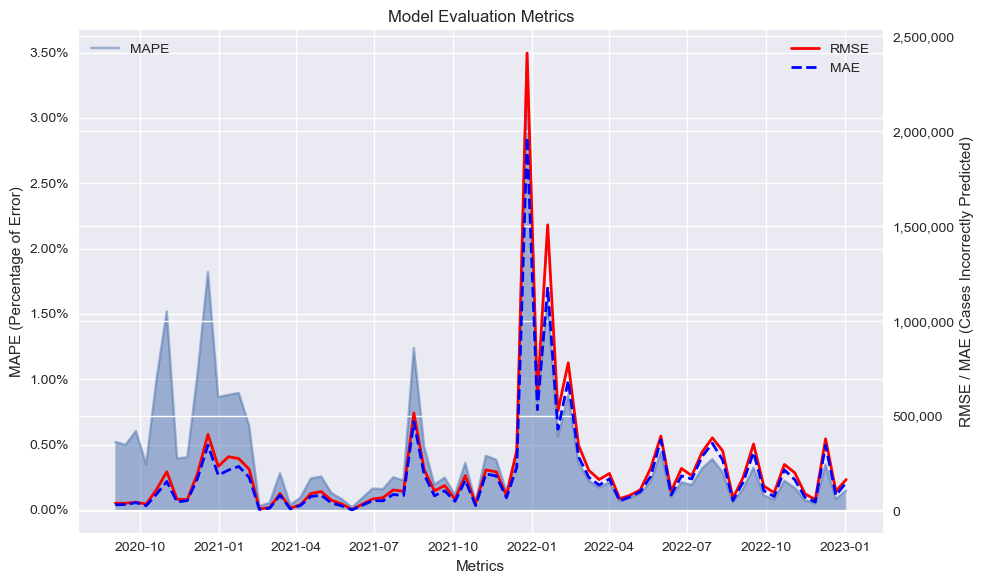

In [ ]:

# Create a plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MAPE as an area plot
sns.lineplot(data=scores, x=scores.index, y='mape', ax=ax1, label='MAPE', alpha=0.5)
ax1.fill_between(scores.index, 0, scores['mape'], alpha=0.5)

# Create a second y-axis for RMSE and MAE
ax2 = ax1.twinx()

# Plot RMSE on the second y-axis
sns.lineplot(data=scores, x=scores.index, y='rmse', ax=ax2, label='RMSE', color='red', linewidth=2)

# Plot MAE on the second y-axis
sns.lineplot(data=scores, x=scores.index, y='mae', ax=ax2, label='MAE', color='blue', linestyle='--', linewidth=2)

# Set title, labels and legend
ax1.set_title('Model Evaluation Metrics')
ax1.set_xlabel('Metrics')
ax1.set_ylabel('MAPE (Percentage of Error)')
ax2.set_ylabel('RMSE / MAE (Cases Incorrectly Predicted)')

# Format y-axes
ax1.yaxis.set_major_formatter(PercentFormatter(100.0))
ax2.yaxis.set_major_formatter(FuncFormatter(comma_format))

# Display the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Create a subplot layout with 2 rows and 1 column
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, subplot_titles=('Percentage Errors (MAPE & SMAPE)', 'Absolute Errors (MAE & RMSE)'))

# Plot for MAPE and SMAPE
fig.add_trace(go.Scatter(x=df.index, y=df['mape']/100, name='MAPE', mode='lines'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['smape']/100, mode='lines', name='SMAPE'), row=1, col=1)

# Plot for MAE and RMSE
fig.add_trace(go.Scatter(x=df.index, y=df['mae'], mode='lines', name='MAE'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['rmse'], mode='lines', name='RMSE'), row=2, col=1)

# Update layout for percentage format on the y-axis of the first subplot
fig.update_layout(title_text="Model Evaluation Metrics", showlegend=True, height=800, width=1000)
fig.update_xaxes(rangeslider=dict(visible=True), title_text="Date", row=2, col=1)  # Add x-range slider control and title
fig.update_yaxes(tickformat="0%", title_text="Percentage Error (Covid Cases)", row=1, col=1)
fig.update_yaxes(title_text="Absolute Error (Covid Cases)", row=2, col=1)

# Display the figure
fig.show()


In [ ]:
def evaluate_and_plot_predictions(pipeline, y, cv):
    """
    Evaluates and plots ARIMA predictions using cross validation.
    
    Parameters:
    - pipeline: The pipeline containing the ARIMA estimator.
    - y: The time series data.
    - cv: The cross validation splitter.

    Returns:
    - model_eval_series: A Series containing evaluation metrics for the model.
    """
    
    # Cross-validated predictions
    predictions1 = pm.model_selection.cross_val_predict(
        pipeline, y, cv=cv, verbose=1, averaging="mean")

    # Plot the predictions over the original series
    x_axis = y.index
    n_test = predictions1.shape[0]

    prediction_df = pd.DataFrame(index = x_axis[-n_test:], data = predictions1, columns = ['Predictions'])
    
    plt.plot(y, alpha=0.75, c='b', label='Original')  # Original series
    plt.plot(prediction_df, alpha=0.75, c='g', label='Forecasts')  # Forecasts
    plt.title("Covid Predictions")
    plt.legend()
    plt.show()

    # Calculate the evaluation metrics
    model1_cv_smape = pm.model_selection.cross_val_score(
        pipeline, y, scoring='smape', cv=cv, verbose=1)

    model1_cv_mse = pm.model_selection.cross_val_score(
        pipeline, y, scoring='mean_squared_error', cv=cv, verbose=1)

    model1_cv_rmse = np.sqrt(model1_cv_mse.tolist())

    # Create a summary Series
    model_eval_series = pd.Series({
        'CV': str(cv),
        'Order': pipeline.steps[-1][1].get_params()['order'],
        'Seasonal Order': pipeline.steps[-1][1].get_params()['seasonal_order'],
        'Average_RMSE': np.average(model1_cv_rmse),
        'Median_RMSE': np.median(model1_cv_rmse),
        'Average_SMAPE': np.average(model1_cv_smape),
        'Median_SMAPE': np.median(model1_cv_smape)
    })
    
    return model_eval_series


In [ ]:
evaluate_and_plot_predictions(pipeline, y, rolling_cv)


ValueError: Input contains NaN.

In [ ]:

predictions1.shape
kkkkk

In [ ]:
predictions1 = pm.model_selection.cross_val_predict(
    pipeline, y, cv=rolling_cv, verbose=1, averaging="mean")

# Plot the predictions over the original series
x_axis = y.index
n_test = predictions1.shape[0]

predictions = pd.DataFrame(index = x_axis[-(n_test+2):], data = predictions1, columns = ['predictions'])

df = pd.concat([predictions, y], axis=1)
df
# grouped = [np.sqrt(mean_squared_error(group.predictions, group.confirmed)) for _, group in df.resample('28D')]
# hello = np.array(grouped)

In [ ]:

model_preds = []
model_smape_score = []
model_rmse_score = []

for _, test_idx in rolling_cv.split(df):
    
    test_set = df.iloc[test_idx]
    if test_set.isna().sum().predictions > 0:
        print(test_set)
    # print(np.sqrt(mean_squared_error(test_set.predictions, test_set.confirmed)))
    # model = pipeline.fit(train_set)
    
    # model_preds.append(model.predict(test_set.index))
    
    # model_smape_score.append(smape(test_set, model_pred[-1]))
    
    # model_rmse_score.append(rmse(test_set, model_pred[-1]))
    
    # df['mse'] = df.apply(lambda x: (x.confirmed - x.predictions)**2, axis=1)

In [ ]:
grabber = pm.model_selection.cross_val_score(
    pipeline, y, cv=rolling_cv, verbose=1, scoring='mean_squared_error')

In [ ]:
len(hello[:-1]), hello[:-1].mean(), np.median(hello[:-1])

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot layout with 2 rows and 1 column
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, subplot_titles=('Percentage Errors (MAPE & SMAPE)', 'Absolute Errors (MAE & RMSE)'))

# Plot for MAPE and SMAPE
fig.add_trace(go.Scatter(x=df.index, y=df['mape']/100, fill='tozeroy', name='MAPE', mode='lines'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['smape']/100, mode='lines', name='SMAPE', line=dict(color='blue', dash='dash')), row=1, col=1)

# Plot for MAE and RMSE
fig.add_trace(go.Scatter(x=df.index, y=df['mae'], mode='lines', name='MAE'), row=1, col=1, secondary_y=True)
fig.add_trace(go.Scatter(x=df.index, y=df['rmse'], mode='lines', name='RMSE', line=dict(color='red')), row=1, col=1, secondary_y=True)

# Update layout and y-axis formats
fig.update_layout(title_text="Model Evaluation Metrics", showlegend=True)
fig.update_yaxes(tickformat="0%", row=1, col=1)  # Format the y-axis of the first subplot as percentages

# Display the figure
fig.show()


ValueError: 
Subplot with type '{subplot_type}' at grid position ({row}, {col}) was not
created with the secondary_y spec property set to True. See the docstring
for the specs argument to plotly.subplots.make_subplots for more information.


In [ ]:
# # Even though we have a dedicated train/test split, we can (and should) still
# # use cross-validation on our training set to get a good estimate of the model
# # performance. We can choose which model is better based on how it performs
# # over various folds.
# model1 = pm.ARIMA(order=(2, 1, 1), freq= 'D', suppress_warnings=True)
# model2 = pm.ARIMA(order=(1, 1, 2),
#                 seasonal_order=(0, 1, 1, 12),
#                 freq= 'D',
#                 suppress_warnings=True)

# cv = pm.model_selection.SlidingWindowForecastCV(window_size=300, step=200, h=30)

# model1_cv_scores = pm.model_selection.cross_val_score(
#     model1, train_df['confirmed'], scoring='smape', cv=cv, verbose=2)

# model2_cv_scores = pm.model_selection.cross_val_score(
#     model2, train_df['confirmed'], scoring='smape', cv=cv, verbose=2)

# print("Model 1 CV scores: {}".format(model1_cv_scores.tolist()))
# print("Model 2 CV scores: {}".format(model2_cv_scores.tolist()))

# # Pick based on which has a lower mean error rate
# m1_average_error = np.average(model1_cv_scores)
# m2_average_error = np.average(model2_cv_scores)
# errors = [m1_average_error, m2_average_error]
# models = [model1, model2]

# # print out the answer
# better_index = np.argmin(errors)  # type: int
# print("Lowest average SMAPE: {} (model{})".format(
#     errors[better_index], better_index + 1))
# print("Best model: {}".format(models[better_index]))

In [ ]:
import itertools

p = d = q = range(0,3)

pdq = list(itertools.product(p,d,q))

pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

ans = []

for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_df,
                                        order=comb,
                                        seasonal_order=combs,
                                        freq='D')
            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        
        except:
            continue


ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])


In [ ]:
# # Capture the current time to measure the time taken by the grid search
# start_time = time.time()

# # Define a GridSearchCV object with the pipeline, parameter grid, and desired settings
# grid = GridSearchCV(pipe, param_grid, return_train_score=True, 
#                     cv=3, refit=True, verbose=1, n_jobs=-1, scoring=scoring_metric)


# tss = TimeSeriesSplit(n_splits=5)

# grid_search = GridSearchCV(pipe, grid, cv=tss, scoring='neg_mean_squared_error', verbose=1)
# grid_search.fit(X, y)

# best_model = grid_search.best_estimator_
# best_rmse = np.sqrt(-grid_search.best_score_)


In [ ]:
# tss = TimeSeriesSplit(n_splits=5)
# df = df.sort_index()



# fold = 0
# preds = []
# scores = []
# for train_idx, val_idx in tss.split(df):
#         train = df.iloc[train_idx]
#         test = df.iloc[val_idx]

#         train = create_features(train)
#         test = create_features(test)

#         FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year',
#                         'lag1','lag2','lag3']
#         TARGET = 'PJME_MW'

#         X_train = train[FEATURES]
#         y_train = train[TARGET]

#         X_test = test[FEATURES]
#         y_test = test[TARGET]

#         reg = CatBoostRegressor()
#         reg.fit(X_train, y_train,
#                 eval_set=[(X_train, y_train), (X_test, y_test)],
#                 verbose=100)

#         y_pred = reg.predict(X_test)
#         preds.append(y_pred)
#         score = np.sqrt(mean_squared_error(y_test, y_pred))
#         scores.append(score)

# print(f'Score across folds {np.mean(scores):0.4f}')
# print(f'Fold scores:{scores}')


#### SARIMA Model Training and Prediction

Once we have our terms, we can train our SARIMA model.


In [ ]:

previous = train_df['new_confirmed'].loc['2023-01-01':]
actual = test_df['new_confirmed']

In [ ]:

# from statsmodels.tsa.arima.model import ARIMA

# # Fit the ARIMA model
# base_model = ARIMA(train_df['confirmed'], order=(16, 1, 25), freq='D')
# arima = base_model.fit()


In [ ]:

# arima.summary()


In [ ]:
# predicted = arima_result.predict(n_periods= len(actual), X=test_df.index)

# arima_result1 = evaluate_arima_forecast(previous, actual, predicted).set_index('Metric')

In [ ]:
model1 = pm.auto_arima(train_df['new_confirmed'], 
                       seasonal=False,
                       stationary=True)


In [ ]:
model1.summary()


In [ ]:

predicted1 = model1.predict(n_periods= len(actual), X=test_df.index)

arima_result2 = evaluate_arima_forecast(previous, actual, predicted1).set_index('Metric')

In [ ]:

# model2 = pm.auto_arima(train_df['new_confirmed'], 
#                         start_p=16, max_p=20, 
#                         start_q=25, max_q=30, # maximum p and q
#                         test='adf',       # use adftest to find optimal 'd'
#                         d=None,           # let model determine 'd'
#                         m=1,              # frequency of series
#                         seasonal=False,   # No Seasonality
#                         stepwise=True, 
#                         )


In [ ]:
# model2.summary()


In [ ]:
# predicted2 = model2.predict(n_periods= len(actual), X=test_df.index)


# res2 = evaluate_arima_forecast(previous, actual, predicted2).set_index('Metric')

Quick Review of ARIMA Modeling

In [ ]:
# pd.concat([res1, res2], axis=1, join='inner', keys=['res1', 'res2'])

## Sarima

In [ ]:
model4 = pm.auto_arima(train_df['new_confirmed'], 
                    seasonal=True,
                    trace=True,
                    scoring='mse'
                    )


In [ ]:
model4.summary()

In [ ]:
predicted4 = model4.predict(n_periods= len(actual), X=test_df.index)

res4 = evaluate_arima_forecast(previous, actual, predicted4).set_index('Metric')


#### SARIMAX Model (if using exogenous variables)

If we want to use external predictors, SARIMAX is the way to go.


In [ ]:


exog_variables = master_df[['exog1', 'exog2']]
model = SARIMAX(master_df['new_confirmed'], exog=exog_variables, order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()
predictions = results.predict(start=start_date, end=end_date, exog=new_exog_data)



# Simple Prophet Model
- Prophet model expects the dataset to be named a specific way. We will rename our dataframe columns before feeding it into the model.
    - Datetime column named: `ds`
    - target : `y`

In [ ]:
display(train_df.head())
test_df.head()

In [ ]:
# Format data for prophet model using ds and y
master_df_train_prophet = train_df.reset_index() \
    .rename(columns={'date':'ds',
                    'new_confirmed':'y'})
    


In [ ]:
%%time
model = Prophet(yearly_seasonality=True)
model.fit(master_df_train_prophet)

In [ ]:
# Predict on test set with model
master_df_test_prophet = test_df.reset_index() \
    .rename(columns={'date':'ds',
                    'new_confirmed':'y'})

forecast = model.predict(master_df_test_prophet)

In [ ]:
from prophet.plot import plot_plotly

fig = plot_plotly(model, forecast) # returns a plotly Figure object
fig.show()

In [ ]:
fig = model.plot_components(master_df_test_fcst)
plt.show()


### Facebook Prophet Analysis

Facebook Prophet is designed for forecasting time series data. Let's see how we can use it.



#### Preparing Data for Prophet

Prophet requires the dataset to have two columns: `ds` and `y`, where `ds` is the timestamp and `y` is the value we want to predict.


In [ ]:


from fbprophet import Prophet

# Preparing data
prophet_df = master_df.reset_index()[['date', 'new_confirmed']]
prophet_df.columns = ['ds', 'y']

# Create and fit model
model = Prophet()
model.fit(prophet_df)

# Predictions
future = model.make_future_dataframe(periods=number_of_days_to_predict)
forecast = model.predict(future)
model.plot(forecast)




### Recurrent Neural Networks (RNNs)

RNNs are suitable for time series prediction due to their ability to recognize patterns in sequences of data.



#### Data Preprocessing for RNNs


In [ ]:


from sklearn.preprocessing import MinMaxScaler

data = master_df['new_confirmed'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences for training
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])




#### Building and Training the RNN


In [ ]:


from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)




#### Predictions and Evaluation


In [ ]:


scaled_predictions = model.predict(X_test)
predictions = scaler.inverse_transform(scaled_predictions)




---

This outline gives a clear walkthrough of the different steps involved in each method. Depending on the specific details of your dataset and the problem at hand, you might need to adjust and fine-tune some of these steps.

In [ ]:
# # estimators = [('scaler', None),
# #             ('feature_selection', None),
# #             ('dim_reducer', None),
# #             ('model', ARIMA())]

# # pipe = Pipeline(estimators) #, memory=cachedir

# # param_grid = {
# #     'model__p': list(range(16)),
# #     'model__d': list(range(3)),
# #     'model__q': list(range(16))
# # }

# # # 4. Split the dataset using TimeSeriesSplit
# # tscv = TimeSeriesSplit(n_splits=5)

# # # 5. Set up and run the GridSearchCV
# # gsearch = GridSearchCV(estimator=pipe, cv=tscv, param_grid=param_grid, verbose=1, n_jobs=-1)
# # gsearch.fit(train_df.index.values.reshape(-1, 1), train_df['new_confirmed'])

# # print(gsearch.best_params_)


# # best_score, best_cfg = float("inf"), None

# # GridSearchCV
# # for train_index, validation_index in tscv.split(train_df['new_confirmed']):
# #     train, test = train_df['new_confirmed'].iloc[train_index], train_df['new_confirmed'].iloc[validation_index]

# #     try:
# #         model = pm.auto_arima(train, start_p=1, start_q=1,
# #                         test='adf',       # use adftest to find optimal 'd'
# #                         max_p=15, max_q=3, # maximum p and q
# #                         m=1,              # frequency of series
# #                         d=None,           # let model determine 'd'
# #                         seasonal=False,   # No Seasonality
# #                         start_P=0, 
# #                         D=0, 
# #                         trace=True,
# #                         error_action='ignore',  
# #                         suppress_warnings=True, 
# #                         stepwise=True, 
# #                         stationary=True,
# #                         n_jobs=-1)
# #     except:
# #         continue
# #     predictions = model.predict(n_periods=len(test))
# #     mse = mean_squared_error(test, predictions)
    
# #     if mse < best_score:
# #         best_score, best_cfg = mse, (model.order, model.seasonal_order)
# #         best_model = model

# # print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
# # best_model.summary()

# # gsearch = GridSearchCV(estimator=model, cv=tscv,
# #                         param_grid=param_search)
# # gsearch.fit(X, y)


# tscv = TimeSeriesSplit(n_splits=5)

# for train_index, validation_index in tscv.split(series['Confirmed']):


# model = pm.auto_arima(y= test_df['new_confirmed'], start_p=1, start_q=1,
#                     ['new_confirmed'], start_p=1, start_q=1,
#                     test='adf',       # use adftest to find optimal 'd'
#                     max_p=20, max_q=5, # maximum p and q
#                     m=1,              # frequency of series
#                     d=None,           # let model determine 'd'
#                     seasonal=False,   # No Seasonality
#                     start_P=0, 
#                     D=0, 
#                     trace=True,
#                     error_action='ignore',  
#                     suppress_warnings=True, 
#                     stepwise=True)

# print(model.summary())

# from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
# import numpy as np
# X = np.array([[4, 5, 6, 1, 0, 2], [3.1, 3.5, 1.0, 2.1, 8.3, 1.1]]).T
# y = np.array([1, 6, 7, 1, 2, 3])

# model = ARIMA()
# param_search = {'max_depth' : [3, 5]}

# tscv = TimeSeriesSplit(n_splits=2)
# gsearch = GridSearchCV(estimator=model, cv=tscv,
#                         param_grid=param_search)
# gsearch.fit(X, y)

In [ ]:
# from statsmodels.tsa.x13 import x13_arima_analysis
# result = x13_arima_analysis(df['your_column_name'])
# print(result.seasadj)  # Seasonally adjusted series

# # Performing seasonal decomposition on 'new_confirmed' column
# decomposition = tsa.seasonal_decompose(master_df['current_hospitalized_patients'], model='additive', period=7)

# # Adding the decomposition data to the dataframe
# master_df["Hosp_Trend"] = decomposition.trend
# master_df["Hosp_Seasonal"] = decomposition.seasonal
# master_df["Hosp_Residual"] = decomposition.resid


# # Creating subplots for the trend, seasonal, and residual components
# cols = ["Hosp_Trend", "Hosp_Seasonal", "Hosp_Residual"]
# fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

# for i, col in enumerate(cols):
#     fig.add_trace(go.Scatter(x=master_df.index, y=master_df[col], name=col), row=i+1, col=1)

# fig.update_layout(height=800, width=1200, title='Seasonal Decomposition of Hospitalized Patients')
# fig.show()

# # Performing seasonal decomposition on 'new_confirmed' column
# decomposition = tsa.seasonal_decompose(master_df['new_fatal'], model='additive', period=12)

# # Adding the decomposition data to the dataframe
# master_df["Fatal_Trend"] = decomposition.trend
# master_df["Fatal_Seasonal"] = decomposition.seasonal
# master_df["Fatal_Residual"] = decomposition.resid


# # Creating subplots for the trend, seasonal, and residual components
# cols = ["Fatal_Trend", "Fatal_Seasonal", "Fatal_Residual"]
# fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

# for i, col in enumerate(cols):
#     fig.add_trace(go.Scatter(x=master_df.index, y=master_df[col], name=col), row=i+1, col=1)

# fig.update_layout(height=800, width=1200, title='Seasonal Decomposition of Daily Fatalities')
# fig.show()
